In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import scipy.stats as stats
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# import the chicago data file
city_data = pd.read_csv('Data/chicago_data.csv')
roll_avg = pd.read_csv('Data/rolling_AVG.csv')
city_data

,date,date_formatted,month,cases_total,deaths_total,hospitalizations_total,cases_age_0_17,cases_age_18_29,cases_age_30_39,cases_age_40_49,...,people_not_positive_age_unknown,people_not_positive_female,people_not_positive_male,people_not_positive_gender_unknown,people_not_positive_latinx,people_not_positive_asian_non_latinx,people_not_positive_black_non_latinx,people_not_positive_white_non_latinx,people_not_positive_other_race_non_latinx,people_not_positive_unknown_race_ethnicity
0,2020-03-07T00:00:00.000,3/7/2020,03 -Mar,3,0,3,0,0,0,0,...,0,8,2,0,1,0,2,6,0,1
1,2020-03-08T00:00:00.000,3/8/2020,03 -Mar,3,0,9,0,0,1,1,...,0,18,23,1,3,1,9,9,2,18
2,2020-03-09T00:00:00.000,3/9/2020,03 -Mar,5,0,3,3,0,0,0,...,0,35,22,2,7,3,8,13,5,23
3,2020-03-10T00:00:00.000,3/10/2020,03 -Mar,11,0,8,1,2,3,2,...,1,30,29,2,10,2,6,16,3,24
4,2020-03-11T00:00:00.000,3/11/2020,03 -Mar,12,0,9,0,3,1,3,...,1,32,10,5,8,1,3,9,3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2020-10-18T00:00:00.000,10/18/2020,10 -Oct,314,0,23,24,76,78,57,...,2,1011,974,8,223,53,253,514,82,868
226,2020-10-19T00:00:00.000,10/19/2020,10 -Oct,1115,2,22,144,262,235,160,...,1,2756,2507,156,1041,176,807,1234,197,1964
227,2020-10-20T00:00:00.000,10/20/2020,10 -Oct,1098,3,21,148,279,211,182,...,3,2773,2446,60,922,188,724,1237,184,2024
228,2020-10-21T00:00:00.000,10/21/2020,10 -Oct,949,4,15,90,292,199,143,...,1,2880,2443,49,919,197,794,1349,197,1916


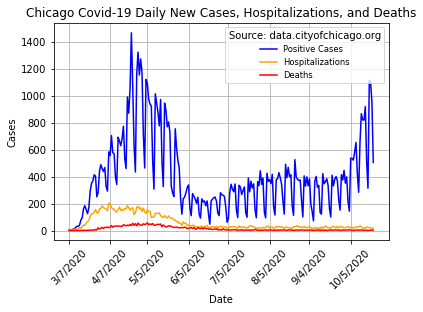

In [2]:
# Generate a plot Chicago COVID 19 Daily New Cases, Hospitalizations, and Deaths
plt.plot(city_data['date_formatted'], city_data['cases_total'], c='b', label = 'Positive Cases')
plt.plot(city_data['date_formatted'], city_data['hospitalizations_total'], c='orange', label = 'Hospitalizations')
plt.plot(city_data['date_formatted'], city_data['deaths_total'], c='r', label = 'Deaths')
plt.title("Chicago Covid-19 Daily New Cases, Hospitalizations, and Deaths")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 45)
plt.legend(loc="best", fontsize='small', title='Source: data.cityofchicago.org')
plt.grid()
plt.show()

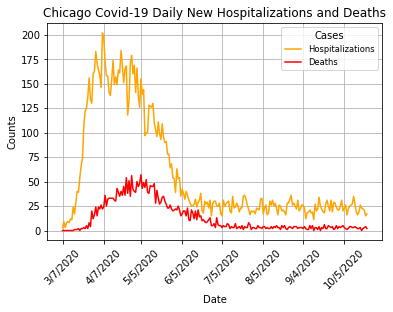

In [3]:
# Generate a plot Chicago COVID 19 Daily Hospitalizations, and Deaths
plt.plot(city_data['date_formatted'], city_data['hospitalizations_total'], c='orange', label = 'Hospitalizations')
plt.plot(city_data['date_formatted'], city_data['deaths_total'], c='r', label = 'Deaths')
plt.title("Chicago Covid-19 Daily New Hospitalizations and Deaths")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 45)
plt.legend(loc="best", fontsize='small', title='Cases')
plt.grid()
plt.show()

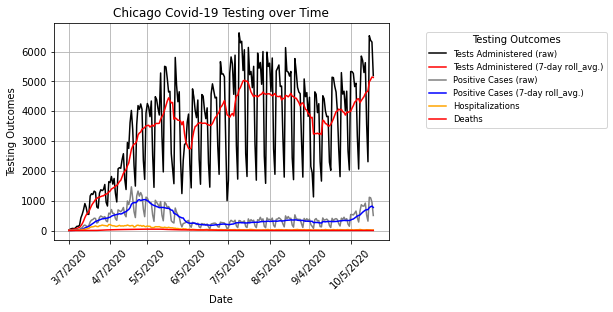

In [4]:
# Generate a plot Chicago COVID 19 Daily Testing Count in comparrison to Daily New Cases, Hospitalizations, and Deaths
# includes a 7 day rolling average to smooth the dips created by weekend closures and delayed reporting
plt.plot(city_data['date_formatted'], city_data['people_tested_total'], c='black', label = 'Tests Administered (raw)')
plt.plot(roll_avg['date_formatted'], roll_avg['people_tested_total'], c='red', label = 'Tests Administered (7-day roll_avg.)')
plt.plot(city_data['date_formatted'], city_data['cases_total'], c='gray', label = 'Positive Cases (raw)')
plt.plot(roll_avg['date_formatted'], roll_avg['cases_total'], c='b', label = 'Positive Cases (7-day roll_avg.)')
plt.plot(city_data['date_formatted'], city_data['hospitalizations_total'], c='orange', label = 'Hospitalizations')
plt.plot(roll_avg['date_formatted'], roll_avg['deaths_total'], c='r', label = 'Deaths')
plt.title("Chicago Covid-19 Testing over Time")
plt.xlabel("Date")
plt.ylabel("Testing Outcomes")
plt.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 45)
plt.legend(loc="lower left", bbox_to_anchor=(1.1, 0.5), fontsize='small', title='Testing Outcomes')
plt.grid()
plt.show()

In [5]:
# Generate a new DataFrame from the rolling average data and calculate the Positivity, Hospitalization, and Case Mortality Rates for plotting
testdf = pd.DataFrame(roll_avg[['date_formatted','day','month','cases_total','people_tested_total','hospitalizations_total','deaths_total']])
testdf['Pos Rate'] = testdf['cases_total']/testdf['people_tested_total']*100
testdf['Hosp Rate'] = testdf['hospitalizations_total']/testdf['cases_total']*100
testdf['Case Mortality'] = testdf['deaths_total']/testdf['cases_total']*100
testdf

,date_formatted,day,month,cases_total,people_tested_total,hospitalizations_total,deaths_total,Pos Rate,Hosp Rate,Case Mortality
0,3/7/2020,Saturday,03 -Mar,1.000000,19.142857,3.285714,0.000000,5.223881,328.571429,0.000000
1,3/8/2020,Sunday,03 -Mar,1.428571,25.428571,4.285714,0.000000,5.617978,300.000000,0.000000
2,3/9/2020,Monday,03 -Mar,2.142857,33.285714,4.428571,0.000000,6.437768,206.666667,0.000000
3,3/10/2020,Tuesday,03 -Mar,3.714286,38.857143,5.142857,0.000000,9.558824,138.461538,0.000000
4,3/11/2020,Wednesday,03 -Mar,5.428571,41.142857,5.857143,0.000000,13.194444,107.894737,0.000000
...,...,...,...,...,...,...,...,...,...,...
225,10/18/2020,Sunday,10 -Oct,701.285714,4682.000000,23.571429,2.428571,14.978336,3.361173,0.346303
226,10/19/2020,Monday,10 -Oct,767.000000,4985.285714,21.714286,2.285714,15.385277,2.831067,0.298007
227,10/20/2020,Tuesday,10 -Oct,800.142857,5060.428571,20.857143,2.142857,15.811761,2.606677,0.267809
228,10/21/2020,Wednesday,10 -Oct,818.428571,5148.857143,20.285714,2.285714,15.895344,2.478618,0.279281


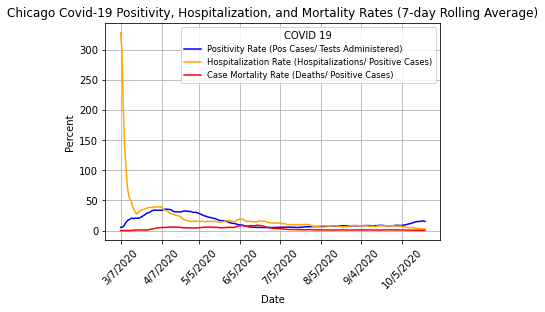

In [6]:
# Plot the Positivity, Hospitalization, and Case Mortality Rates
plt.plot(testdf['date_formatted'], testdf['Pos Rate'], c='b', label = 'Positivity Rate (Pos Cases/ Tests Administered)')
plt.plot(testdf['date_formatted'], testdf['Hosp Rate'], c='orange',label = 'Hospitalization Rate (Hospitalizations/ Positive Cases)')
plt.plot(testdf['date_formatted'], testdf['Case Mortality'], c='r',label = 'Case Mortality Rate (Deaths/ Positive Cases)')
plt.title("Chicago Covid-19 Positivity, Hospitalization, and Mortality Rates (7-day Rolling Average)")
plt.xlabel("Date")
plt.ylabel("Percent")
plt.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 45)
plt.legend(loc="best", fontsize='small', title='COVID 19')
plt.grid()
plt.show()

In [7]:
merge_df = pd.DataFrame(roll_avg[['date_formatted']])
clean_data = pd.merge(merge_df, city_data, how='inner', on='date_formatted')

In [8]:
ratedf = pd.DataFrame(clean_data[['date_formatted','day','month','cases_total','people_tested_total','hospitalizations_total','deaths_total']])
ratedf['Pos Rate'] = ratedf['cases_total']/ratedf['people_tested_total']*100
ratedf['Hosp Rate'] = ratedf['hospitalizations_total']/ratedf['cases_total']*100
ratedf['Case Mortality'] = ratedf['deaths_total']/ratedf['cases_total']*100
ratedf

,date_formatted,day,month,cases_total,people_tested_total,hospitalizations_total,deaths_total,Pos Rate,Hosp Rate,Case Mortality
0,3/7/2020,Saturday,03 -Mar,3,13,3,0,23.076923,100.000000,0.000000
1,3/8/2020,Sunday,03 -Mar,3,45,9,0,6.666667,300.000000,0.000000
2,3/9/2020,Monday,03 -Mar,5,64,3,0,7.812500,60.000000,0.000000
3,3/10/2020,Tuesday,03 -Mar,11,72,8,0,15.277778,72.727273,0.000000
4,3/11/2020,Wednesday,03 -Mar,12,59,9,0,20.338983,75.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
225,10/18/2020,Sunday,10 -Oct,314,2307,23,0,13.610750,7.324841,0.000000
226,10/19/2020,Monday,10 -Oct,1115,6534,22,2,17.064585,1.973094,0.179372
227,10/20/2020,Tuesday,10 -Oct,1098,6377,21,3,17.218128,1.912568,0.273224
228,10/21/2020,Wednesday,10 -Oct,949,6321,15,4,15.013447,1.580611,0.421496


In [9]:
summary_stats = pd.DataFrame(ratedf[['people_tested_total','cases_total','Pos Rate','hospitalizations_total','Hosp Rate','deaths_total','Case Mortality']])
test = summary_stats['people_tested_total'].sum()
pos = summary_stats['cases_total'].sum()
hosp = summary_stats['hospitalizations_total'].sum()
mort = summary_stats['deaths_total'].sum()
pos_rate = summary_stats['cases_total'].sum()/summary_stats['people_tested_total'].sum()*100
hosp_rate = summary_stats['hospitalizations_total'].sum()/summary_stats['cases_total'].sum()*100
case_mort_rate = summary_stats['deaths_total'].sum()/summary_stats['cases_total'].sum()*100
print(f'In the city of Chicago since 15 Mar 2020, {test} COVID 19 tests have been administered.')
print ('With {:0} positive results for a Positivity Rate of {:.2f}%'.format(pos, pos_rate))
print ('There have been {:0} COVID 19 related hospitalizations for a Hospitalization Rate of {:.2f}%'.format(hosp, hosp_rate))
print ('There have been {:0} COVID 19 related deaths for a Case Mortality Rate of {:.2f}%'.format(mort, case_mort_rate))

In the city of Chicago since 15 Mar 2020, 795227 COVID 19 tests have been administered.
With 94256 positive results for a Positivity Rate of 11.85%
There have been 13420 COVID 19 related hospitalizations for a Hospitalization Rate of 14.24%
There have been 3036 COVID 19 related deaths for a Case Mortality Rate of 3.22%


In [10]:
summary_stats.describe()

,people_tested_total,cases_total,Pos Rate,hospitalizations_total,Hosp Rate,deaths_total,Case Mortality
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,3457.508696,409.808696,14.178178,58.347826,18.391619,13.200000,3.348058
std,1768.960684,289.201442,10.038784,54.321627,23.389790,15.100363,3.618473
min,13.000000,3.000000,3.232462,3.000000,1.580611,0.000000,0.000000
25%,1812.000000,219.000000,6.472617,22.000000,7.478613,3.000000,0.752352
50%,3889.500000,346.500000,8.752036,28.500000,12.805144,5.000000,1.924678
75%,4895.750000,512.500000,21.257116,96.750000,22.937478,22.000000,4.917150
max,6630.000000,1466.000000,38.852097,202.000000,300.000000,57.000000,23.404255


In [11]:
month_stats = ratedf.groupby(['month']).mean()
month_stats

,cases_total,people_tested_total,hospitalizations_total,deaths_total,Pos Rate,Hosp Rate,Case Mortality
month,,,,,,,
03 -Mar,176.480000,624.040000,65.560000,3.240000,24.144810,54.192694,1.077551
04 -Apr,719.133333,2245.033333,162.133333,34.433333,32.474399,26.744180,5.393640
05 -May,688.935484,3702.580645,104.774194,36.419355,18.686766,17.824328,6.424025
06 -Jun,210.266667,3604.066667,32.133333,14.033333,5.996476,16.835821,7.659555
07 -Jul,266.483871,4593.322581,24.387097,4.161290,5.779522,11.021434,2.112137
08 -Aug,321.612903,4312.548387,24.838710,3.129032,7.278201,9.476423,1.253435
09 -Sep,305.100000,3725.666667,22.566667,2.766667,8.049108,8.923152,1.103499
10 -Oct,600.954545,4614.590909,22.818182,2.863636,12.621907,5.098754,0.678926


<AxesSubplot:title={'center':'deaths_total'}, xlabel='month'>

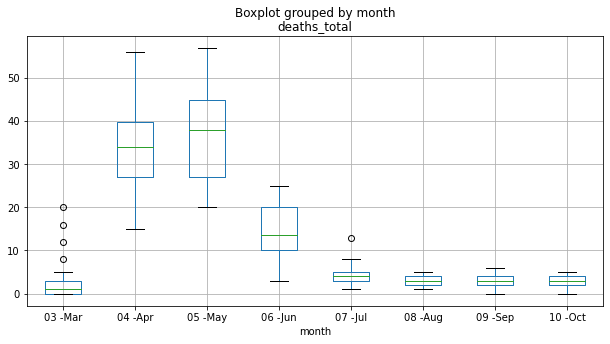

In [12]:
# Create a boxplot to compare means
ratedf.boxplot("deaths_total", by="month", figsize=(10, 5))

In [13]:
group1 = ratedf[ratedf["month"] == '03 -Mar']["deaths_total"]
group2 = ratedf[ratedf["month"] == '04 -Apr']["deaths_total"]
group3 = ratedf[ratedf["month"] == '05 -May']["deaths_total"]
group4 = ratedf[ratedf["month"] == '06 -Jun']["deaths_total"]
group5 = ratedf[ratedf["month"] == '07 -Jul']["deaths_total"]
group6 = ratedf[ratedf["month"] == '08 -Aug']["deaths_total"]
group7 = ratedf[ratedf["month"] == '09 -Sep']["deaths_total"]
group8 = ratedf[ratedf["month"] == '10 -Oct']["deaths_total"]

In [14]:
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

F_onewayResult(statistic=170.63212083157856, pvalue=1.2249259607393036e-85)

In [15]:
stats.f_oneway(group5, group6, group7, group8)

F_onewayResult(statistic=4.263692453032254, pvalue=0.006871488803387524)

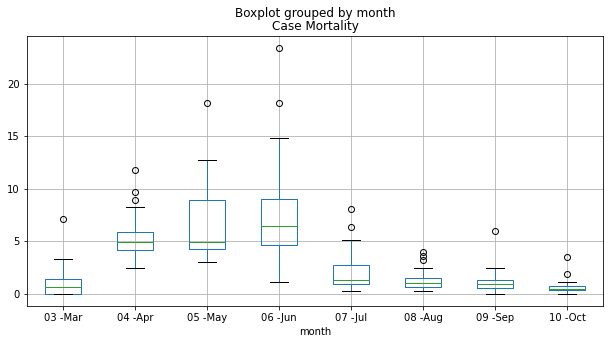

In [16]:
ratedf.boxplot("Case Mortality", by="month", figsize=(10, 5))
group1 = ratedf[ratedf["month"] == '03 -Mar']["Case Mortality"]
group2 = ratedf[ratedf["month"] == '04 -Apr']["Case Mortality"]
group3 = ratedf[ratedf["month"] == '05 -May']["Case Mortality"]
group4 = ratedf[ratedf["month"] == '06 -Jun']["Case Mortality"]
group5 = ratedf[ratedf["month"] == '07 -Jul']["Case Mortality"]
group6 = ratedf[ratedf["month"] == '08 -Aug']["Case Mortality"]
group7 = ratedf[ratedf["month"] == '09 -Sep']["Case Mortality"]
group8 = ratedf[ratedf["month"] == '10 -Oct']["Case Mortality"]

In [17]:
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

F_onewayResult(statistic=36.123472580092944, pvalue=1.9009915208356105e-33)